In [8]:
import numpy as np
import scipy as sp
import cv2 as cv
import skimage as ski
import matplotlib.pyplot as plt

In [42]:
plt.rcParams['image.cmap'] = 'gray'
plt.rcParams['figure.figsize'] = [16.0, 8.0]

### 1. Дилатація

[[0 1 0]
 [1 1 1]
 [0 1 0]]


(<AxesSubplot:title={'center':'binary_dilatation'}>,
 Text(0.5, 1.0, 'binary_dilatation'))

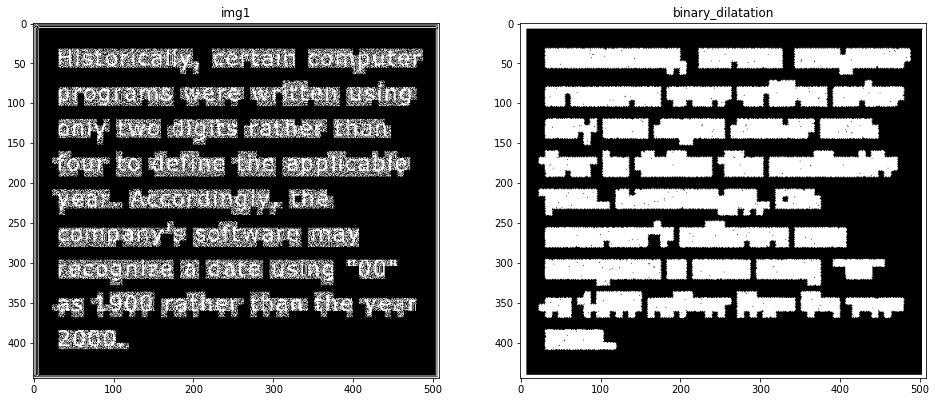

In [43]:
I = {}
I[1] = ski.io.imread('pic.1.jpg') > 0

fp = ski.morphology.diamond(1)
print(fp)
res = ski.morphology.binary_dilation(I[1], fp)

plt.subplot(121), plt.imshow(I[1]), plt.title('img1')
plt.subplot(122), plt.imshow(res), plt.title('binary_dilatation')

Бачимо, що це жипег з артефактами, а не чистеньке зображення. Бінарна дилатація не спрацює. Беремо напівтонову.

[[0 1 0]
 [1 1 1]
 [0 1 0]]


(<AxesSubplot:title={'center':'dilatation'}>,
 Text(0.5, 1.0, 'dilatation'))

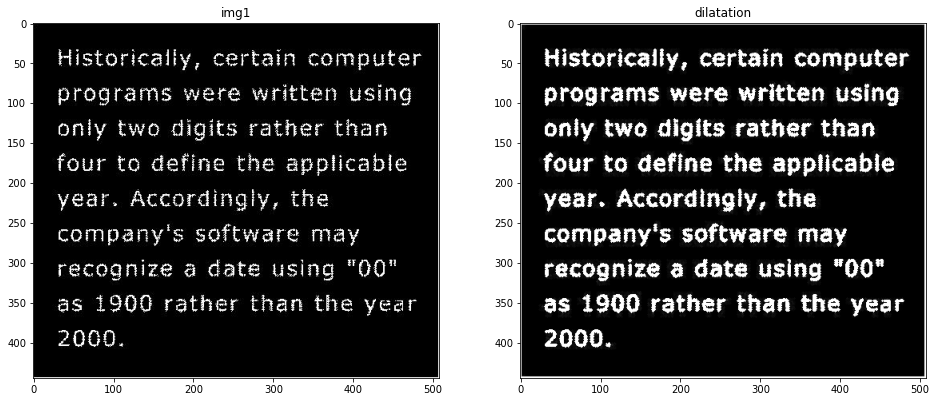

In [44]:
I[1] = ski.io.imread('pic.1.jpg')

fp = ski.morphology.diamond(1)
print(fp)
res = ski.morphology.dilation(I[1], fp)

plt.subplot(121), plt.imshow(I[1]), plt.title('img1')
plt.subplot(122), plt.imshow(res), plt.title('dilatation')

Так краще.

### 2. Ерозія

In [48]:
I[2] = ski.io.imread('pic.2.jpg')
print(I[2].shape)

(258, 258, 3)


Тобто маємо кольорове зображення. Можна перевести у відтінки сірого, але я оброблю покомпонентно

(10, 10)


(<AxesSubplot:title={'center':'erosion (square 10)'}>,
 Text(0.5, 1.0, 'erosion (square 10)'))

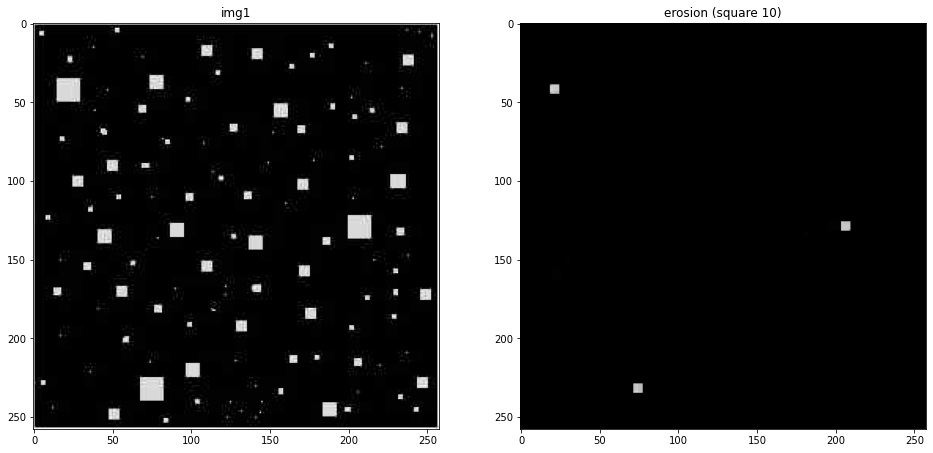

In [53]:
fp = ski.morphology.square(10)
print(fp.shape)
res = np.empty_like(I[2])
for i in range(0,3):
    res[:,:,i] = ski.morphology.erosion(I[2][:,:,i], fp)

plt.subplot(121), plt.imshow(I[2]), plt.title('img1')
plt.subplot(122), plt.imshow(res), plt.title('erosion (square 10)')

### 3. Розмикання та замикання
- Розмикання - це ерозія, а потім дилатація
- Замикання - це дилатація, а потім ерозія

Знову маємо кольорове зображення. Тут я вже перейду в грейскейл

(240, 317, 3)
(240, 317)


(<matplotlib.image.AxesImage at 0x1dfefc7c670>, None)

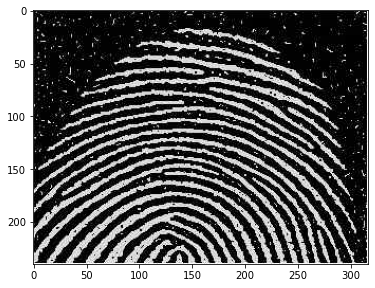

In [58]:
I = ski.io.imread('pic.3.jpg')
print(I.shape)
I = ski.color.rgb2gray(I)
print(I.shape)
plt.imshow(I), plt.gcf().set_size_inches((6,6))

[[0 1 0]
 [1 1 1]
 [0 1 0]]


(<matplotlib.image.AxesImage at 0x1dff4648190>, Text(0.5, 1.0, 'замикання'))

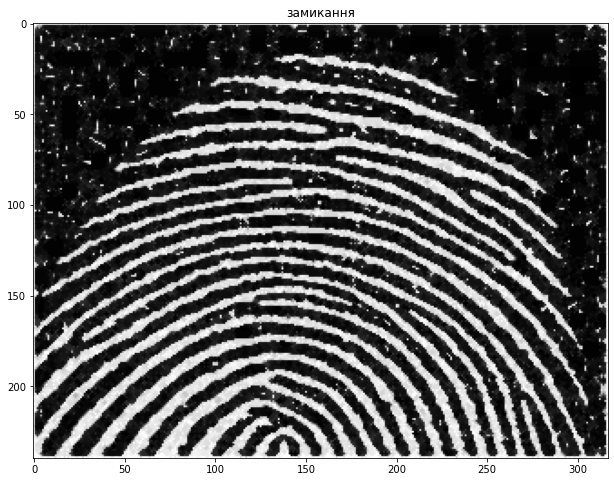

In [87]:
fp = ski.morphology.diamond(1)
print(fp)
res = ski.morphology.closing(I, fp)
plt.imshow(res), plt.title('замикання')

[[1 1 1]
 [1 1 1]
 [1 1 1]]


(<matplotlib.image.AxesImage at 0x1dff40f9280>, Text(0.5, 1.0, 'розмикання'))

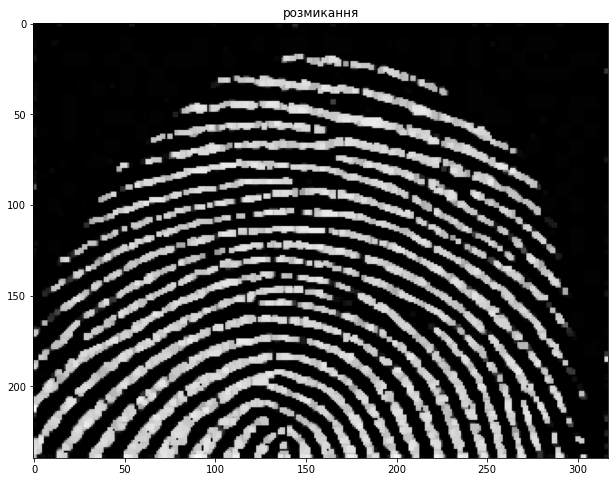

In [83]:
fp = ski.morphology.square(3)
print(fp)
res = ski.morphology.opening(I, fp)
plt.imshow(res), plt.title('розмикання')

### 4. Потоншення
